# Autovalores e autovetores associados a matriz correspondente a equação da onda

O código inicia declarando as váriaveis do problema, onde é definido o número de pontos discretos (N) equidistantes, o comprimento do intervalo (L) e o dx por teoria é dado pela expressão $$ dx = L/(N-1)$$.

Para a construção da matriz, foi criada a variavel ```diagonal```,  utilizando np.ones, para criar uma array com N-2 elementos (todos são 1). De forma análoga, a variável ```off_diagonal``` cria uma array com N-3 elementos. 

Por fim, a variável D corresponde a matriz que buscamos encontrar os auvalores e autovetores associados. Para isso, foi utilizada
a função ```np.diag``` para computar as diagonais da matriz e ela recebe dois parametros: a matriz em questão e o número da diagonal (se for 0 é a principal, se for 1 é acima da princpal e se for -1 é abaixo). Como ilustração, temos o seguinte exemplo:

```
x = np.arange(9).reshape((3,3)) #cria uma matriz 3x3 com elemento que vao de 1 a 9
```
```
np.diag(x) #pega a diagonal principal
>>>array([0, 4, 8]) 
```

```
np.diag(x, k=1) #com o parametro k=1, pega a diagonal acima da principal. 
>>>array([1, 5])  
```

```
np.diag(x, k=-1) #com o parametro k=-11, pega a diagonal abaixo da principal. 
>>>array([3, 7]) 


Para encontrar os autovalores e autovetor dessa matriz, é utilizada a função para matrizes simétricas: ```np.linalg.eigh```. Detalhe: foi preciso inverter a matriz dos autovalores númericos, pois o último dela equivale ao primeiro termo do analítico. 

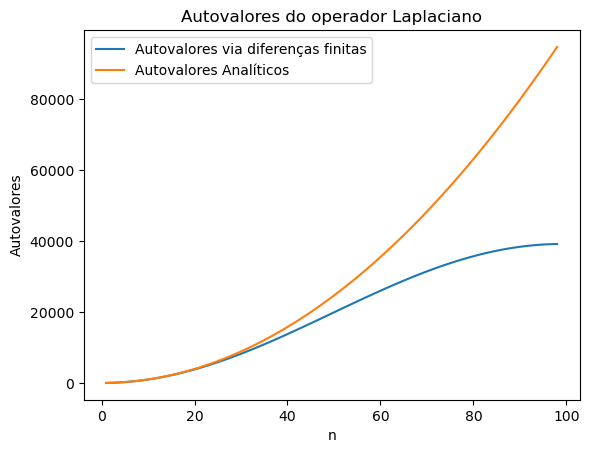

In [11]:

import numpy as np
import matplotlib.pyplot as plt


N = 100  
L = 1
dx = L / (N - 1) 

# Definindo a matriz D
diagonal = -2 * np.ones(N-2)
diagonal_2 = np.ones(N-3)
D = (-1 / dx**2) * (np.diag(diagonal) + np.diag(diagonal_2, 1) + np.diag(diagonal_2, -1))

autovalores, autovetores = np.linalg.eigh(D)

#print(autovalores)


n = np.arange(1, N-1)
autovalores_analitico = (n* np.pi/L)**2
#print(autovalores_analitico)

plt.plot(n, autovalores, label='Autovalores via diferenças finitas')
plt.plot(n, autovalores_analitico, label='Autovalores Analíticos')
plt.legend()
plt.title('Autovalores do operador Laplaciano')
plt.xlabel('n') 
plt.ylabel('Autovalores')
plt.show()

